In [6]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Ouvrir l'image avec rasterio
image=r'C:\Users\pc\Desktop\PFE\test3.tif'
roi=r'C:\Users\pc\Desktop\PFE\ROI_test3.tif'
with rasterio.open(image) as src:
    num_bands = src.count
    nb_col = src.width
    nb_lin = src.height

    # Lire les données de chaque bande de l'image
    band_data = [src.read(band) for band in range(1, num_bands + 1)]

    # Fusionner les données des bandes en un seul tableau numpy
    merged_data = np.stack(band_data, axis=-1)


# Convertir les données en DataFrame pandas
df = pd.DataFrame(merged_data.reshape(-1, merged_data.shape[-1]))

# Enregistrer les données dans un fichier CSV
csv_filename = r'C:\Users\pc\Desktop\PFE\image_test.csv'
df.to_csv(csv_filename, index=False)

print(f"Les données des bandes de l'image ont été enregistrées dans {csv_filename}")

Les données des bandes de l'image ont été enregistrées dans C:\Users\pc\Desktop\PFE\image_test.csv


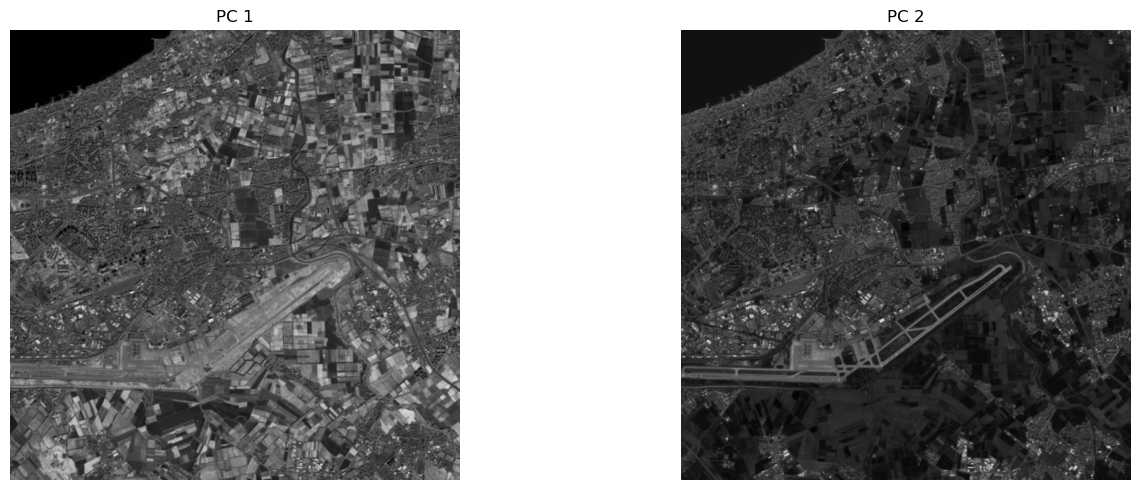

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
# Read the data from the CSV file
df = pd.read_csv(csv_filename)

# Apply PCA
number_of_pc = 2
pca = PCA(n_components=number_of_pc)
pc = pca.fit_transform(df.values)

# Display the PC images
fig, ax = plt.subplots(nrows=1, ncols=number_of_pc, figsize=(15, 5))

for i in range(number_of_pc):
    pc_image = pc[:, i].reshape((1000, 1000))  # Replace height and width with the dimensions of your original image
    ax[i].imshow(pc_image, cmap='gray')
    ax[i].set_title(f'PC {i+1}')
    ax[i].axis('off')
    image = Image.fromarray(pc_image)
    image.save(f"pcALLBANDS_{i+1}.tif", format="TIFF")
plt.tight_layout()
plt.show()

In [9]:
# Create a DataFrame with PC images
pc_df = pd.DataFrame(pc, columns=[f"PC_{i+1}" for i in range(number_of_pc)])

# Save the PC images as a CSV file
pc_df.to_csv(r'C:\Users\pc\Desktop\PFE\case 2\pc.csv', index=False)

In [10]:
# Charger les fichiers CSV
df1 = pd.read_csv(csv_filename)
df2 = pd.read_csv(r'C:\Users\pc\Desktop\PFE\case 2\pc.csv')
result = pd.concat([df1, df2], axis=1)
full=r'C:\Users\pc\Desktop\PFE\case 2\full.csv'
# Enregistrer le résultat dans un nouveau fichier CSV
result.to_csv(full, index=False)
print(result)

           0     1     2     3     4     5     6     7     8     9  \
0       1262  1263  1130  1108  1095  1106  1090  1110  1077  1067   
1       1240  1268  1130  1119  1105  1091  1123  1118  1085  1068   
2       1278  1273  1127  1119  1105  1091  1128  1118  1085  1068   
3       1260  1253  1122  1114  1096  1092  1100  1096  1086  1074   
4       1220  1248  1139  1114  1096  1092  1104  1096  1086  1074   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
999995  1172  1461  1244  1914  3910  4480  4856  4688  2304  1589   
999996  1181  1504  1261  1914  3910  4480  4892  4688  2304  1589   
999997  1148  1500  1260  1963  4076  4662  4752  4816  2338  1606   
999998  1167  1511  1266  1963  4076  4662  4783  4816  2338  1606   
999999  1194  1523  1272  2028  4468  5066  5412  5288  2351  1611   

               PC_1         PC_2  
0      -4859.050231 -1589.334847  
1      -4838.667699 -1590.555941  
2      -4834.385469 -1577.798251  
3      -4866.098714

In [11]:
# Ouvrir l'image avec rasterio
with rasterio.open(roi) as src:
    num_bands = src.count
    nb_col = src.width
    nb_lin = src.height

    # Lire les données de chaque bande de l'image
    band_data = [src.read(band) for band in range(1, num_bands + 1)]

    # Fusionner les données des bandes en un seul tableau numpy
    merged_data = np.stack(band_data, axis=-1)

# Convertir les données en valeurs numériques (si nécessaire)
merged_data = merged_data.astype(np.uint8)  # Convertir en entiers non signés de 8 bits

# Créer un DataFrame pandas à partir des données
df = pd.DataFrame(merged_data.reshape(-1, merged_data.shape[-1]))
# Enregistrer les données dans un fichier CSV
r1 = r'C:\Users\pc\Desktop\PFE\case 2\R1.csv'
df.to_csv(r1, index=False, header=None)

In [12]:
# Charger les fichiers CSV
df1 = pd.read_csv(full)
df2 = pd.read_csv(r1)
result = pd.concat([df1, df2], axis=1)

# Enregistrer le résultat dans un nouveau fichier CSV
result.to_csv(r'C:\Users\pc\Desktop\PFE\case 2\concatenated_full.csv', index=False)

In [13]:
data = pd.read_csv(r'C:\Users\pc\Desktop\PFE\case 2\concatenated_full.csv')


data = data[data.iloc[:, -1] != 0]
data = data.drop(data.index[-1])
# Displaying the filled DataFrame
display(data.head(10).style.format("{0:.2f}").set_caption("Few lines of the dataset:"))

# Checking the count of missing data and the shape of the DataFrame
print('Missing Data:', data.isna().sum().sum(), 'Shape is:', data.shape)

,0,1,2,3,4,5,6,7,8,9,PC_1,PC_2,0.1
2362,1820.00,2154.00,2484.00,2730.00,2784.00,2852.00,2760.00,2795.00,3220.00,2955.00,-825.01,1213.66,3.00
3361,1810.00,2188.00,2428.00,2730.00,2784.00,2852.00,2732.00,2795.00,3220.00,2955.00,-839.48,1197.72,3.00
3362,1894.00,2288.00,2516.00,2730.00,2784.00,2852.00,2864.00,2795.00,3220.00,2955.00,-755.86,1293.19,3.00
3363,1844.00,2208.00,2462.00,2750.00,2869.00,2838.00,2924.00,2832.00,3367.00,3069.00,-658.74,1320.75,3.00
3364,1804.00,2186.00,2430.00,2750.00,2869.00,2838.00,2988.00,2832.00,3367.00,3069.00,-629.58,1276.93,3.00
4360,1824.00,2230.00,2462.00,2676.00,2736.00,2837.00,2776.00,2840.00,3186.00,2891.00,-831.72,1166.14,3.00
4361,1868.00,2236.00,2520.00,2721.00,2834.00,2887.00,2874.00,2895.00,3295.00,2905.00,-660.55,1249.62,3.00
4362,1816.00,2256.00,2476.00,2721.00,2834.00,2887.00,2982.00,2895.00,3295.00,2905.00,-605.85,1206.73,3.00
4363,1778.00,2218.00,2432.00,2742.00,2914.00,2995.00,3036.00,3044.00,3434.00,2985.00,-396.71,1214.39,3.00
4364,1740.00,2154.00,2432.00,2742.00,2914.00,2995.00,3058.00,3044.00,3434.00,2985.00,-391.64,1175.95,3.00


Missing Data: 0 Shape is: (9132, 13)


In [14]:
data_array = np.array([data])
print(data_array.shape)
x = data_array[0, :, 0:12]
y = data_array[0, :, 12]

(1, 9132, 13)


In [15]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, cohen_kappa_score, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,GlobalMaxPooling1D
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers

In [16]:
############################  Split data ######
seed=42
y_train,y_test,x_train,x_test=train_test_split(y,x,test_size=0.20,random_state=42)
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (7305, 12)
y_train :  (7305,)
x_test  :  (1827, 12)
y_test  :  (1827,)


In [17]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [18]:
################## Reshape the Data ###########################

sample_size =x_train.shape[0] # number of samples in train set
time_steps  =x_train.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

x_train_reshaped = x_train.reshape(sample_size,time_steps,input_dimension)
x_test_reshaped = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print("After reshape train data set shape:\n", x_train_reshaped.shape)
print("1 Sample shape:\n",x_train_reshaped[0].shape)
print("An example sample:\n", x_train_reshaped[0])


print("After reshape test data set shape:\n", x_test_reshaped.shape)
print("1 Sample shape:\n",x_test_reshaped[0].shape)
print("An example sample:\n", x_test_reshaped[0])

After reshape train data set shape:
 (7305, 12, 1)
1 Sample shape:
 (12, 1)
An example sample:
 [[ 0.0853771 ]
 [ 0.11241319]
 [ 0.09136848]
 [ 0.14379302]
 [ 0.38150085]
 [ 0.44538389]
 [ 0.45384671]
 [ 0.44852936]
 [ 0.19427036]
 [ 0.1295635 ]
 [ 0.34851914]
 [-0.15489028]]
After reshape test data set shape:
 (1827, 12, 1)
1 Sample shape:
 (12, 1)
An example sample:
 [[ 0.20004527]
 [ 0.22775783]
 [ 0.25017016]
 [ 0.26289068]
 [ 0.27667124]
 [ 0.29590345]
 [ 0.29711493]
 [ 0.30498953]
 [ 0.37010647]
 [ 0.32179879]
 [-0.43355323]
 [-0.05008252]]


In [19]:
train_shape = x_train_reshaped.shape
input_shape = (train_shape[1], train_shape[2])

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Input
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, Input, GlobalMaxPooling1D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras import Model


# Model parameter
neuron = 64
drop = 0.2
kernel = 2
pool = 2
N_CLASSES=4
# Make sequential model
model = Sequential([
  Input(input_shape),
  Conv1D(neuron * 1, kernel, activation='relu'),
  Conv1D(neuron * 1, kernel, activation='relu'),
  MaxPooling1D(pool),
  Dropout(drop),
  Conv1D(neuron * 2, kernel, activation='relu'),
  Conv1D(neuron * 2, kernel, activation='relu'),
  MaxPooling1D(pool),
  Dropout(drop),
  GlobalMaxPooling1D(),
  Dense(neuron * 2, activation='relu'),
  Dropout(drop),
  Dense(neuron * 1, activation='relu'),
  Dropout(drop),
  Dense(N_CLASSES + 1, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 11, 64)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 10, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 4, 128)              │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 3, 128)              │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,949 (324.02 KB)

 Trainable params: 82,949 (324.02 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model

# Compline the model
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create callback to stop training if loss not decreasing
stop = EarlyStopping(
    monitor='loss',
    patience=5
)

# Fit the model
result = model.fit(
    x=x_train_reshaped, y=y_train,
    validation_data=(x_test_reshaped, y_test),
    batch_size=1024,
    callbacks=[stop],
    epochs=100,
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.2879 - loss: 1.5890 - val_accuracy: 0.3306 - val_loss: 1.4890
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3321 - loss: 1.4497 - val_accuracy: 0.3306 - val_loss: 1.3463
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3416 - loss: 1.3524 - val_accuracy: 0.3306 - val_loss: 1.2597
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3711 - loss: 1.2741 - val_accuracy: 0.6229 - val_loss: 1.0899
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5816 - loss: 1.0821 - val_accuracy: 0.8424 - val_loss: 0.7912
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7667 - loss: 0.7862 - val_accuracy: 0.8533 - val_loss: 0.4356
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8023 - loss: 0.5048 - val_accuracy: 0.8555 - val_loss: 0.2900
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8131 - loss: 0.3799 - val_accuracy: 0.8571 - val_loss

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step


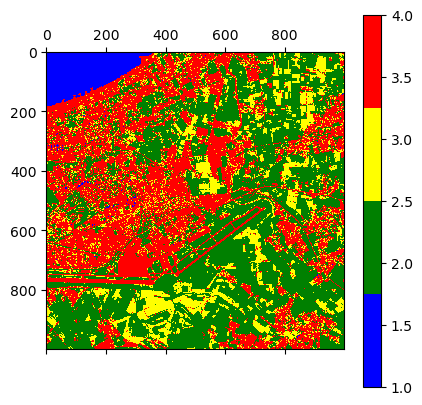

In [22]:
from matplotlib.colors import ListedColormap
# Load the data from the CSV file
data1 = pd.read_csv(full)

# Normalize the data
data1 = tf.keras.utils.normalize(data1, axis=1)

# Predict using the model
predicted = model.predict(data1)

# Convert predicted probabilities to predicted classes
predicted_classes = np.argmax(predicted, axis=1)

# Reshape the predicted classes to match image dimensions
height, width = 1000, 1000
predicted_image = np.reshape(predicted_classes, (height, width))
# Define the custom color palette for each class
colors = ['blue', 'green', 'yellow', 'red']
cmap = ListedColormap(colors)
# Display the image
plt.matshow(predicted_image, cmap=cmap)
plt.colorbar()
plt.show()

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


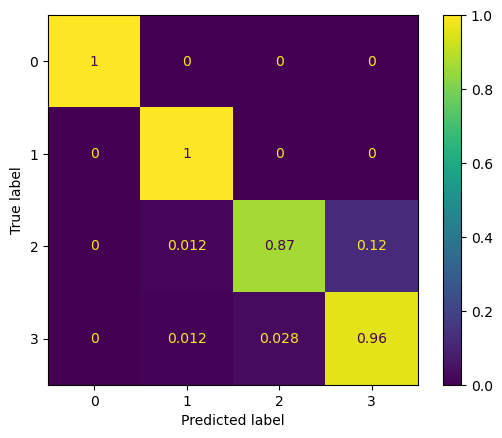

In [23]:
# Predict test data
prediction = np.argmax(model.predict(x_test), axis=1).flatten()

# Confusion matrix
cm = confusion_matrix(y_test, prediction, normalize='true')
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

In [24]:
# Calculate Cohen's Kappa for the hybrid model
kappa = cohen_kappa_score(y_test, prediction)
print("Cohen's Kappa for CNN Model:", kappa)

# Calculate accuracy for the hybrid model
accuracy = accuracy_score(y_test, prediction)
print("Accuracy for CNN Model:", accuracy)

Cohen's Kappa for CNN Model: 0.9616441592934197
Accuracy for CNN Model: 0.9720853858784894


In [25]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score,confusion_matrix
# Evaluate the model on the validation data
evaluation_results = model.evaluate(x_test_reshaped, y_test)

# Print or use the evaluation results as needed
print("Evaluation Results:", evaluation_results)
# Make predictions using the trained model on the validation data
y_pred = model.predict(x_test)

# Display the shape of the predicted values
print("Shape of Predicted Values:", y_pred.shape)
# Get the indices of the maximum values along axis 1 for predicted values
prediction = np.argmax(y_pred, axis=1)

# Get the indices of the maximum values along axis 1 for actual values (ground truth)
actual = y_test
# Calculating F1 Score using the macro average method
f1 = f1_score(actual, prediction, average='macro')

# Calculating accuracy score
accuracy = accuracy_score(actual, prediction)

# Calculating precision using the macro average method
precision = precision_score(actual, prediction, average='macro')

# Calculating recall using the macro average method
recall = recall_score(actual, prediction, average='macro')

# Printing the computed metrics
print('F1 Score:', f1)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9723 - loss: 0.0881
Evaluation Results: [0.08554237335920334, 0.9720853567123413]
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Shape of Predicted Values: (1827, 5)
F1 Score: 0.9611842472105322
Accuracy: 0.9720853858784894
Precision: 0.9665573825202469
Recall: 0.956874039938556


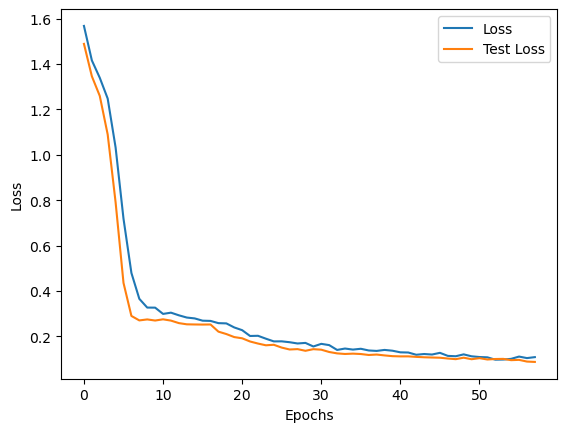

In [26]:
plt.plot(result.history['loss'], label='Loss')
plt.plot(result.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

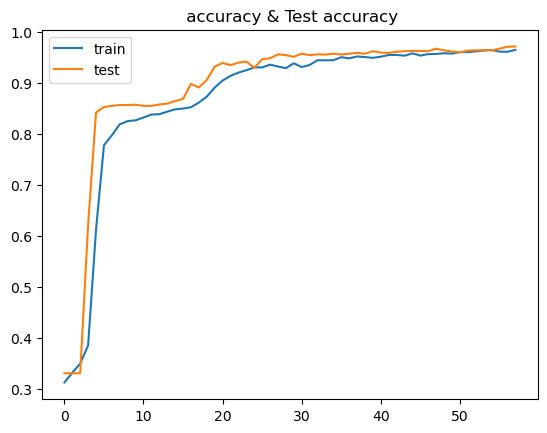

In [27]:
plt.plot(result.history['accuracy'],label='train')### accuracy train
plt.plot(result.history['val_accuracy'],label='test') ### accuracy test
plt.title(' accuracy & Test accuracy')
plt.legend()
plt.show()